# Stpes:
 ### Algo
 1. Read dataset 
- load data set
- check info, statistical info etc.
- understand the dataset

 2. Visualizing the dataset
- plot scatter plot for indep variable

 3. Performing simple linear regression
- take x and y
- split the data into train and test dataset
- build a linear model using statsmodel
- build model on train dataset
- build model on test dataset
- find params and summary
- plot predicted line

 4. Residual analysis
- find predict value for train data

 5. prediction on test set
- build model on test dataset
- add constant on test dataset
- find params and summary
- find predict value
- evaluat RMSE and R sq.
- plot predict line

 6. Linear regression using sklearn
- split data into train and test data
- if X variables have 1D shape then reshape it 2D
- fit the model (train data)
- find coeff. and intercept
- evaluate R sq, for train as well as test data    

## Step 1: Reading and Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# statistical information of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# check if there is any null value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Step 2: Visualising the Data

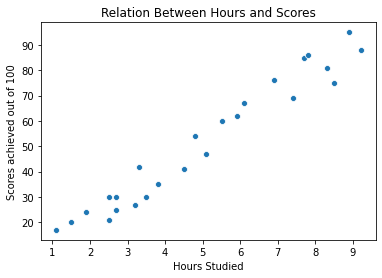

In [7]:
sns.scatterplot(x = data.Hours,y = data.Scores)
plt.xlabel('Hours Studied')
plt.ylabel('Scores achieved out of 100')
plt.title('Relation Between Hours and Scores')
plt.show()

- from above graph we can see that there is a positive linear relationship between the Hours studied and the score achieved. since it's have dependent variable(Y) and one independet variable(X) we can direactly apply linear regression

## Step 3: Performing Simple Linear Regression
- Equation of linear regression
- 𝑦=𝑐+𝑚x
- 𝑦  is the Score
- 𝑐  is the intercept
- 𝑚 is the coefficient for the feature
- In our case:
𝑦=𝑐+𝑚×Hours 
- The  𝑚  values are called the model coefficients or model parameters.

In [8]:
X = data['Hours']  # independent variable
Y = data['Scores']  # dependent variable

#### Split data into two dataset testing and training dataset

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1, random_state=0)

#### Building a Linear Model by Statsmodel.api

In [11]:
# importing statsmodel.api

import statsmodels.api as sm

In [12]:
# adding constant to get an intercept

x_train_sm = sm.add_constant(x_train)
x_train_sm.head()

,const,Hours
16,1.0,2.5
11,1.0,5.9
22,1.0,3.8
17,1.0,1.9
24,1.0,7.8


In [13]:
# fit the regression line using OLS (Ordinary Least Sq.)

lr = sm.OLS(y_train, x_train_sm).fit()

In [14]:
# print the prameter m(coeff. of variable) and c(constant)

lr.params

const    2.520077
Hours    9.854755
dtype: float64

In [15]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     405.4
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           9.49e-15
Time:                        21:42:01   Log-Likelihood:                -68.102
No. Observations:                  22   AIC:                             140.2
Df Residuals:                      20   BIC:                             142.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5201      2.788      0.904      0.377      -3.295       8.335
Hours          9.8548      0.489     20.135      0.000       8.834      10.876
==============================================================================
Omnibus:                        3.835   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                1.824
Skew:                          -0.388   Prob(JB):                        0.402
Kurtosis:                       1.822   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for Hours is 9.8548, with a very low p value The coefficient is statistically significant. So the association is not purely by chance.
R - squared is 0.953 Meaning that 95.3% of the variance in Sales is explained by Hours This is a very good R-squared value.
F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.
####  Y = 2.5201+9.8548*Hours

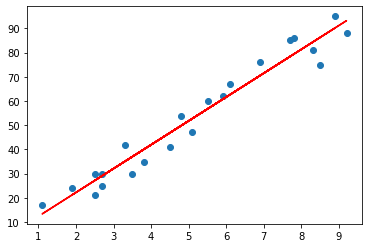

In [16]:
plt.scatter(x_train, y_train)

# r (red) color of predicted line

plt.plot(x_train, 2.5201+9.8548*x_train, 'r')
plt.show()

## Step 4: Residual Analysis

In [17]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)  # residual RSS
res.sum()

3.339550858072471e-13

#### Looking for pattern in the residuals

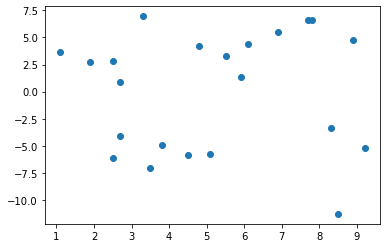

In [18]:
plt.scatter(x_train, res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

In [19]:
# add constant to X_test

x_test_sm = sm.add_constant(x_test)

# predict the y values corresponding to x_test_sm

y_test_pred = lr.predict(x_test_sm)

#### Calculate RMSE and R_sq

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
# Mean sq. error and Root Mean sq error
MSE = mean_squared_error(y_test, y_test_pred)
print("MSE :",MSE)
RMSE = np.sqrt(MSE)
print("RMSE: ",RMSE)

MSE : 32.86556964734201
RMSE:  5.732850045774964


#### visualizing the fit on the test set

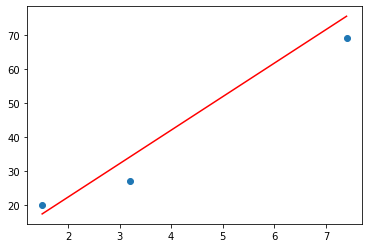

In [22]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 2.5201+9.8548 * x_test, 'r')
plt.show()

## Step 6: Linear Regression using sklearn
- load data
- visualize it
- split data into train and test
- create an obj. of linear regression
- fit the model
- see the params, make prediction
- evaluate (R sq.)

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [24]:
# split data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [25]:
# reshape it into 2-D 
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [26]:
print(X_train.shape)   # 2-D
print(Y_train.shape)   # 1-D
print(X_test.shape)    # 2-D
print(Y_test.shape)    # 1-D

(22, 1)
(22,)
(3, 1)
(3,)


In [27]:
lr = LinearRegression()

In [28]:
# fitting the model
lr.fit(X_train,Y_train)

LinearRegression()

In [29]:
# to see the parameters of train dataset

print("Coeff:     ",lr.coef_)     # coeff. of X(train) variable
print("Intercept: ",lr.intercept_)  # constant (c)                   

Coeff:      [9.85475541]
Intercept:  2.5200767068662273


- The equationwe get is the same as what we got before!
#### 2.5201+9.8548 * Hours

#### make prediction for train as well as test dataset

In [30]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [31]:
r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(Y_test, y_pred_test)

In [32]:
print("R sq. for train dataset: ", r2_train)
print("R sq. for test dataset: ", r2_test)

R sq. for train dataset:  0.9529891020405061
R sq. for test dataset:  0.9298077534821834


## Q:- What will be predicted score if a student studies for 9.25 hrs/ day?

In [37]:
hour = float(input("Enter Study Hour: "))

Enter Study Hour:  9.25


In [38]:
hour = [[hour]]
lr.predict(hour)

array([93.67656425])

#### Solution:-  predicted score if a student studies for 9.25 hrs/ day is `93.6765`